In [1]:
NAME = 'Shopping-Centers'

_________________

In [2]:
import numpy as np
import random
from math import sqrt, ceil
import nepzeb

In [3]:
n = 1000

mu = 4 #rate

t = 0

ni = n//2

T = 60

ar = sorted(np.random.exponential(1/mu,10000))[2000]
br = sorted(np.random.exponential(1/mu,10000))[8000]

pr = 0.9


l = 1000
c = 100

ns = ni
nh = n - ns
nd = 0
nu = 0
nr = 0
nu = 0



In [4]:
ar,br

(0.05502220677099547, 0.406095778349916)

________

<div dir=rtl >
    تعداد مرکز خرید‌ها را مشخص می‌کنیم، برای هر مرکز خرید اندازه هر ضلع مربع آن به صورت تصادفی با کورلیشن به اندازه ماتریس اصلی تولید می‌کنیم.
    </div>

In [5]:
#measure of shopping center

number_of_shopping_center = 1

lsc = [random.randint(l//100, l//10) for i in range(number_of_shopping_center)]

ug = 0.9
ag = 1
bg = 20 * ag


In [6]:
lsc

[67]

__________

<div dir=rtl>
    هر کدام از افراد را به تصادف در نقطه‌ای ثابت در ماتریس جا می‌دهیم.
    موقعیت هر کس را به صورت
    ((x,y),[in the which shopping center / main matrix])
    تعریف می‌کنیم، در شروع همه در ماتریس اصلی حضور دارند.
   
</div>

In [7]:
def random_per():
    N = []
    while len(N) < n:
        zz = (random.randint(1,l), random.randint(1,l))
        if not(zz) in N:
            N.append((zz,0))
    return(N)
N = random_per()

In [8]:
N[:5]

[((435, 625), 0),
 ((18, 447), 0),
 ((497, 252), 0),
 ((322, 334), 0),
 ((599, 630), 0)]

_______________

<div dir=rtl>
    توابع زیر توابع معرفی شده در مثال سه هستند که به صورت عمومی برای نقطه داده شده و لیستی که به آن داده می‌شود با کسانی که فاصله اقلیدسی کمتر مساوی c
    دارند، نرخ را محاسبه می‌کند.
    لازم به ذکر است نرم‌های دیگر مانند فاصله منهتن هم مناسب مدل هستند.
</div>

In [9]:
def f_1(node,X):
    x = node[0][0]
    y = node[0][1]
    u = 0
    
    for each_cell in range(len(X)):
        (a,b) = X[each_cell]
        dis = sqrt((x - a)** 2 + (y - b)**2)
        if  dis <= c:
            #f(i,j)= mu * \delta_{d(i,j)} 
            u += mu

    return(u)




In [10]:
def f_2(node,X):
    x = node[0][0]
    y = node[0][1]
    u = 0
    
    for each_cell in range(len(X)):
        (a,b) = X[each_cell]
        dis = sqrt((x - a)** 2 + (y - b)**2)
        if  dis <= c:
            #f(i,j)= mu /(1 + d(i,j)) * \delta_{d(i,j)} 
            u += mu / 1+ dis
    return(u)


________

<div dir=rtl>
    لیستی خالی برای کسانی که در مرکز خرید هستند ایجاد می‌کنیم که با توجه به زمان پایان خرید به ماتریس اصلی بر گردند.
</div>

In [11]:
people_in_shopping_center = []

<div dir=rtl>
    باتوجه به اینکه نرخ به مرکز خرید رفتن
    ug
    و زمان تصادفی یکنواختی در آنجا می‌مانند تابعی تعریف کردیم که 
    اول زمان را تخمین می‌زند و اگر زمان از اولین اتفاق‌ها کمتر بود
    به تعداد ممکنه افراد را به مرکز‌خرید‌ها جا به جا می‌کند.
    
</div>

In [12]:
def go_shop(t,x,y):
    
    
    go_shop = []
    for i in range(n):
        if N[i][1] == 0:
            go_shop.append(np.random.exponential(ug))
        else:
            go_shop.append(float('inf'))
    
    if sorted(go_shop)[0] < min(x,y):
        for index in range(len(go_shop)):
            if go_shop[index] < min(x,y):
                
                ss = random.randint(1,number_of_shopping_center)
                N[index] = ((N[index][0][0], N[index][0][1]),ss)
                
                c = np.random.uniform(ag,bg)
                people_in_shopping_center.append((t + c , index))



________________


<div dir=rtl>
    در لحظه
    t
    اگر زمان حضور افراد در مراکز خرید به پایان رسیده بود، آنها را به ماتریس اولیه بر می‌گرداند.
</div>

In [13]:
def back_shop():
    count = 0
    if len(people_in_shopping_center) > 0 :
        
        if sorted(people_in_shopping_center)[0][0] <= t:

            for i in range(len(people_in_shopping_center)):

                if people_in_shopping_center[i][0] <= t:
                    count += 1

                    index = people_in_shopping_center[i][1]
                    time = people_in_shopping_center[i][0]

                    N[index] = ((N[index][0][0],N[index][0][1]),0)

    return(count)
                

_____


<div dir=rtl>
    لیستی به تعداد نفرات جامعه ایجاد می‌کنیم که به تصادف  افراد سالم و مریض وضعیت آن‌ها مشخص شده است.
</div>


In [14]:
society = ['sick' for i in range(int(ns))] + ['healthy' for j in range(int(nh))]
random.shuffle(society)


<div dir=rtl>
    لیستی به تعداد افراد جامعه صفر تولید می‌کنیم، اگر فردی یکبار بهبود پیدا کرد خانه متعلق به اون به ۱ تغییر می‌کند.
</div>


In [15]:
recoverd = np.zeros(n)

<div dir=rtl>
    برای محاسبه افرادی که تا به امروز مریض نشده‌اند، لیستی از اعداد یک درست می‌کنیم، در صورتی که مریض شود به صفر تغییر پیدا می‌کند.
</div>

In [16]:
health = np.ones(n)


<div dir=rtl>
    لیست خالی برای نگهداری زمان پایان هر فردی که در نقاهت به سر می‌برد ایجاد می‌کنیم.
</div>


In [17]:
tu_list = []

__________

<div dir=rtl>
    دو تابع اصلی در این شبیه سازی که فرآیند اصلی را انجام می‌دهند
    .
    با توجه به سوال سه که سیگما را برای افراد مریض و در دوران نقاهت تعریف می‌کند.
    این تابع برای هر فرد با توجه به موقعیتی که دارد، یعنی در کدام مرکز خرید و یا کدام محل کار و یا در ماتریس اصلی لیستی از همسایه‌های
    مریض و یا در دوران نقاهت می‌دهد
</div>

In [18]:
def NS(node):

    NS = []

    #He/She is in the main Matrix
    if node[1] == 0:
        for person in range(n):
            if society[person] == 'sick' and (N[person][1] == 0):
                NS.append(N[person][0])
                

        
    #He/She is in the shopping Centers
    else:
        which = node[1]
        for person in range(n):
            if society[person] == 'sick':
                if N[person][1] == which:
                    NS.append((np.random.randint(1,lsc[which-1]),np.random.randint(1,lsc[which-1])))
    
                              
    return(list(NS))


In [19]:
def NS_NU():
    
    NS = []
    #He/She is in the main Matrix
    if node[1] == 0:
        for person in range(n):
            if society[person] == 'sick' and (N[person][1] == 0):
                NS.append(N[person][0])
                  
    #He/She is in the shopping Centers
    else:
        which = node[1]
        for person in range(n):
            if society[person] == 'sick':
                if N[person][1] == which:
                    NS.append((np.random.randint(1,lsc[which-1]),np.random.randint(1,lsc[which-1])))
    
    NU = []
    
    
    wh = node[1]

    #He/She is in the main matrix
    if node[1] == 0:
        for person in range(len(tu_list)):
            if tu_list[person][1][1] == 0:
                NU.append(tu_list[person[1]])
                
    
    #He/She is in the Shoping Centers
    else:
        wh = node[1]
        for person in range(len(tu_list)):
            if tu_list[person][1][1] == wh:
                NU.append((np.random.randint(lsc[wh-1]),np.random.randint(lsc[wh-1])))
                
    
    
    
    
    return(list(NU+NS))

________

<div dir=rtl>
   زمان وقوع اولین مریضی و اینکه کدام فرد را تولید می‌کنیم، در صورتی که زمان قبل از بهبود فردی دیگر رخ دهد، تابع اصلی آن را اجرا می کنیم.
    در این تابع بر خلاف خلاصه پروژه μ
    به عنوان میانگین ( و نه نرخ)
    متغیر پواسون فرض شده است.
    در صورت نیاز
    MU
    را به 
    1/MU
    تغییر دهید.
    در صورت صفر بودن MU
    در این شرایط هم از شرط خطی‌ای استفاده شده که از ارور تقسیم بر صفر جلوگیری شود.
    
</div>

In [20]:
#return time and index of person who get sick

def NewCase_occur():
    
    fall_ill_chance = []
    for every_person in range(len(society)):
        
        #toye on ghesmati ke khob mishe or dovom lazem nist
        if (society[every_person] == 'healthy'): #or (society[every_person] == 'recoverd'):
            
            #compute rate of Falling ill
            MU = f_1(N[every_person], NS(N[every_person]))
            
            
            
            fall_ill_chance.append(np.random.exponential(1/MU) if MU else float('inf'))

        #sick or dead or recoverd
        else:
            fall_ill_chance.append(float('inf'))

    return(min(fall_ill_chance),fall_ill_chance.index(min(fall_ill_chance)))


In [21]:
#how the inline if work
print(np.random.exponential(1/0) if 0 else float('inf'))

inf


In [22]:
def NewCase(tt, index):
    global t
    global ns
    global nh
    
    t += tt
    ns += 1
    nh -= 1
    
    society[index] = 'sick'
    health[index] = 0

___________

<div dir=rtl>
    اتفاق دوم هم همانند اول ایجاد می‌کنیم، در صورتی که زمان رخداد کمتر از اتفاق اول باشد،
    تابع اصلی اتفاق اول را اجرا می‌کنیم.
    با توجه به شرط سوال اول که امکان مریض شدن  دوباره افراد ممکن/ناممکن است.
    تابع اصلی اتفاق دوم را به دو صورت نوشته شده است. در صورت تمایل از هرکدام می‌شود، استفاده کرد.
    
</div>

In [23]:
#getting better or dead
def tr_occur():
    
    v = []
    for ill in range(len(society)):
        if society[ill] == 'sick':
            v.append(np.random.uniform(ar,br))

        else:
            v.append(float('inf'))
            
    return(min(v),v.index(min(v)))

In [24]:
def tr_a(tt,index):
    global nd
    
    global nh
    global nr
    global nu

    global ns
    
    global t
    
    t += tt
    
    if random.random() < pr:
        
        nh += 1
        nr += 1
        nu += 1
        ns -= 1
        
        tu_list.append( ((t+(np.random.uniform(0.1,1))),N[index]) )

        society[index] = 'recoverd'
        recoverd[index] = 1
    else:
        
        nd += 1
        ns -= 1
        society[index] = 'dead'
        

In [25]:
def tr(tt,index):
    
    global nd
    global nh
    global nr
    global nu
    global ns
    global t
    
    t += tt
    
    if random.random() < pr:
        
        nh += 1
        nr += 1
        nu += 1
        ns -= 1
        
        tu_list.append( ((t+(np.random.uniform(0.1,1))),N[index]) )

        society[index] = 'healthy'
        recoverd[index] = 1
    else:
        
        nd += 1
        ns -= 1
        society[index] = 'dead'

________

In [26]:
fileName = NAME +'number: {}'.format(number_of_shopping_center) +'-n:{},ni:{},mu:{},ar:{},br:{},pr:{}'.format(n,ni,mu,ar,br,pr)
f = open('{}.csv'.format(fileName), 'w')
f.write('Event,Time,Healthy People,Ill People,Recoverd people,RIP,\n')

58

______________

In [27]:
while (t < T):
    
 
    
    #if Somebody want come back
    q = back_shop()
    people_in_shopping_center = people_in_shopping_center[q:]
    
    #check if one or more convalescence time have been over
    tu_list.sort()
    if (len(tu_list) > 0):
        if (tu_list[0][0] <= t):
            count = 0
            for i in range(len(tu_list)):
                if tu_list[i][0] <= t:
                    count += 1
            nu -= count
            tu_list = tu_list[count:]
            

    X = NewCase_occur()
    Y = tr_occur()
    
    
    go_shop(t,X[0],Y[0])
    
    #Check if both are inf
    if X[0] == Y[0] == float('inf'):
        break
        
    if (X[0] <= Y[0]):
        NewCase(X[0],X[1])
        f.write('[sick],{},{},{},{},{}, \n'.format(t,nh,ns,int(sum(recoverd)),nd))
        
    if (Y[0] < X[0]):
        tr(Y[0], Y[1])
        f.write('[heal/dead],{},{},{},{},{}, \n'.format(t,nh,ns,int(sum(recoverd)),nd))
        



In [28]:
t

60.00571115986803

In [29]:
nh + nd + ns

1000

In [30]:
nh,nr,nd,ns

(875, 948, 98, 27)

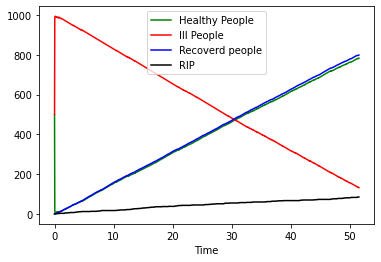

In [31]:
nepzeb.plotter('{}.csv'.format(fileName))